## Define the Convolutional Neural Network

After you've looked at the data you're working with and, in this case, know the shapes of the images and of the keypoints, you are ready to define a convolutional neural network that can *learn* from this data.

In this notebook and in `models.py`, you will:
1. Define a CNN with images as input and keypoints as output
2. Construct the transformed FaceKeypointsDataset, just as before
3. Train the CNN on the training data, tracking loss
4. See how the trained model performs on test data
5. If necessary, modify the CNN structure and model hyperparameters, so that it performs *well* **\***

**\*** What does *well* mean?

"Well" means that the model's loss decreases during training **and**, when applied to test image data, the model produces keypoints that closely match the true keypoints of each face. And you'll see examples of this later in the notebook.

---


## CNN Architecture

Recall that CNN's are defined by a few types of layers:
* Convolutional layers
* Maxpooling layers
* Fully-connected layers

You are required to use the above layers and encouraged to add multiple convolutional layers and things like dropout layers that may prevent overfitting. You are also encouraged to look at literature on keypoint detection, such as [this paper](https://arxiv.org/pdf/1710.00977.pdf), to help you determine the structure of your network.


### TODO: Define your model in the provided file `models.py` file

This file is mostly empty but contains the expected name and some TODO's for creating your model.

---

## PyTorch Neural Nets

To define a neural network in PyTorch, you define the layers of a model in the function `__init__` and define the feedforward behavior of a network that employs those initialized layers in the function `forward`, which takes in an input image tensor, `x`. The structure of this Net class is shown below and left for you to fill in.

Note: During training, PyTorch will be able to perform backpropagation by keeping track of the network's feedforward behavior and using autograd to calculate the update to the weights in the network.

#### Define the Layers in ` __init__`
As a reminder, a conv/pool layer may be defined like this (in `__init__`):
```
# 1 input image channel (for grayscale images), 32 output channels/feature maps, 3x3 square convolution kernel
self.conv1 = nn.Conv2d(1, 32, 3)

# maxpool that uses a square window of kernel_size=2, stride=2
self.pool = nn.MaxPool2d(2, 2)      
```

#### Refer to Layers in `forward`
Then referred to in the `forward` function like this, in which the conv1 layer has a ReLu activation applied to it before maxpooling is applied:
```
x = self.pool(F.relu(self.conv1(x)))
```

Best practice is to place any layers whose weights will change during the training process in `__init__` and refer to them in the `forward` function; any layers or functions that always behave in the same way, such as a pre-defined activation function, should appear *only* in the `forward` function.

#### Why models.py

You are tasked with defining the network in the `models.py` file so that any models you define can be saved and loaded by name in different notebooks in this project directory. For example, by defining a CNN class called `Net` in `models.py`, you can then create that same architecture in this and other notebooks by simply importing the class and instantiating a model:
```
    from models import Net
    net = Net()
```

In [1]:
# load the data if you need to; if you have already loaded the data, you may comment this cell out
# -- DO NOT CHANGE THIS CELL -- #
!mkdir /data
!wget -P /data/ https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
!unzip -n /data/train-test-data.zip -d /data

--2021-04-21 02:13:55--  https://s3.amazonaws.com/video.udacity-data.com/topher/2018/May/5aea1b91_train-test-data/train-test-data.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.197.32
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.197.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 338613624 (323M) [application/zip]
Saving to: ‘/data/train-test-data.zip’

train-test-data.zip 100%[===================>] 322.93M  47.7MB/s    in 7.5s    

2021-04-21 02:14:03 (43.1 MB/s) - ‘/data/train-test-data.zip’ saved [338613624/338613624]

Archive:  /data/train-test-data.zip
   creating: /data/test/
  inflating: /data/test/Abdel_Aziz_Al-Hakim_00.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_01.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_10.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_11.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_40.jpg  
  inflating: /data/test/Abdel_Aziz_Al-Hakim_41.jpg  
  inflating: /data/test/Abdullah_Gul_10

<div class="alert alert-info">**Note:** Workspaces automatically close connections after 30 minutes of inactivity (including inactivity while training!). Use the code snippet below to keep your workspace alive during training. (The active_session context manager is imported below.)
</div>
```
from workspace_utils import active_session

with active_session():
    train_model(num_epochs)
```


In [2]:
# import the usual resources
import matplotlib.pyplot as plt
import numpy as np

# import utilities to keep workspaces alive during model training
from workspace_utils import active_session

# watch for any changes in model.py, if it changes, re-load it automatically
%load_ext autoreload
%autoreload 2

In [3]:
## TODO: Define the Net in models.py

import torch
import torch.nn as nn
import torch.nn.functional as F

## TODO: Once you've define the network, you can instantiate it
# one example conv layer has been provided for you
from models import Net

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (maxPool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropOut1): Dropout(p=0.2)
  (batchNorm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (maxPool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropOut2): Dropout(p=0.2)
  (batchNorm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1))
  (maxPool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropOut3): Dropout(p=0.2)
  (batchNorm3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(128, 256, kernel_size=(5, 5), stride=(1, 1))
  (maxPool4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropOut4): Dro

## Transform the dataset 

To prepare for training, create a transformed dataset of images and keypoints.

### TODO: Define a data transform

In PyTorch, a convolutional neural network expects a torch image of a consistent size as input. For efficient training, and so your model's loss does not blow up during training, it is also suggested that you normalize the input images and keypoints. The necessary transforms have been defined in `data_load.py` and you **do not** need to modify these; take a look at this file (you'll see the same transforms that were defined and applied in Notebook 1).

To define the data transform below, use a [composition](http://pytorch.org/tutorials/beginner/data_loading_tutorial.html#compose-transforms) of:
1. Rescaling and/or cropping the data, such that you are left with a square image (the suggested size is 224x224px)
2. Normalizing the images and keypoints; turning each RGB image into a grayscale image with a color range of [0, 1] and transforming the given keypoints into a range of [-1, 1]
3. Turning these images and keypoints into Tensors

These transformations have been defined in `data_load.py`, but it's up to you to call them and create a `data_transform` below. **This transform will be applied to the training data and, later, the test data**. It will change how you go about displaying these images and keypoints, but these steps are essential for efficient training.

As a note, should you want to perform data augmentation (which is optional in this project), and randomly rotate or shift these images, a square image size will be useful; rotating a 224x224 image by 90 degrees will result in the same shape of output.

In [4]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

# the dataset we created in Notebook 1 is copied in the helper file `data_load.py`
from data_load import FacialKeypointsDataset
# the transforms we defined in Notebook 1 are in the helper file `data_load.py`
from data_load import Rescale, RandomCrop, Normalize, ToTensor


## TODO: define the data_transform using transforms.Compose([all tx's, . , .])
# order matters! i.e. rescaling should come before a smaller crop
data_transform = transforms.Compose([Rescale(256),
                                     RandomCrop(224),
                                     #RandomHorizontalFlip(), # not in data_load.py
                                     Normalize(),
                                     ToTensor()])

# testing that you've defined a transform
assert(data_transform is not None), 'Define a data_transform'

In [5]:
# create the transformed dataset
transformed_dataset = FacialKeypointsDataset(csv_file='/data/training_frames_keypoints.csv',
                                             root_dir='/data/training/',
                                             transform=data_transform)


print('Number of images: ', len(transformed_dataset))

# iterate through the transformed dataset and print some stats about the first few samples
for i in range(4):
    sample = transformed_dataset[i]
    print(i, sample['image'].size(), sample['keypoints'].size())

Number of images:  3462
0 torch.Size([1, 224, 224]) torch.Size([68, 2])
1 torch.Size([1, 224, 224]) torch.Size([68, 2])
2 torch.Size([1, 224, 224]) torch.Size([68, 2])
3 torch.Size([1, 224, 224]) torch.Size([68, 2])


/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


## Batching and loading data

Next, having defined the transformed dataset, we can use PyTorch's DataLoader class to load the training data in batches of whatever size as well as to shuffle the data for training the model. You can read more about the parameters of the DataLoader, in [this documentation](http://pytorch.org/docs/master/data.html).

#### Batch size
Decide on a good batch size for training your model. Try both small and large batch sizes and note how the loss decreases as the model trains. Too large a batch size may cause your model to crash and/or run out of memory while training.

**Note for Windows users**: Please change the `num_workers` to 0 or you may face some issues with your DataLoader failing.

In [6]:
# load training data in batches
batch_size = 10   # 32, 64 # couldn't test larger batch sizes. gave errors in training.

train_loader = DataLoader(transformed_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)


## Before training

Take a look at how this model performs before it trains. You should see that the keypoints it predicts start off in one spot and don't match the keypoints on a face at all! It's interesting to visualize this behavior so that you can compare it to the model after training and see how the model has improved.

#### Load in the test dataset

The test dataset is one that this model has *not* seen before, meaning it has not trained with these images. We'll load in this test data and before and after training, see how your model performs on this set!

To visualize this test data, we have to go through some un-transformation steps to turn our images into python images from tensors and to turn our keypoints back into a recognizable range. 

In [7]:
# load in the test data, using the dataset class
# AND apply the data_transform you defined above

# create the test dataset
test_dataset = FacialKeypointsDataset(csv_file='/data/test_frames_keypoints.csv',
                                             root_dir='/data/test/',
                                             transform=data_transform)



In [8]:
# load test data in batches
batch_size = 10   # 16

test_loader = DataLoader(test_dataset, 
                          batch_size=batch_size,
                          shuffle=True, 
                          num_workers=4)

## Apply the model on a test sample

To test the model on a test sample of data, you have to follow these steps:
1. Extract the image and ground truth keypoints from a sample
2. Wrap the image in a Variable, so that the net can process it as input and track how it changes as the image moves through the network.
3. Make sure the image is a FloatTensor, which the model expects.
4. Forward pass the image through the net to get the predicted, output keypoints.

This function test how the network performs on the first batch of test data. It returns the images, the transformed images, the predicted keypoints (produced by the model), and the ground truth keypoints.

In [9]:
# test the model on a batch of test images

def net_sample_output():
    
    # iterate through the test dataset
    for i, sample in enumerate(test_loader):
        
        # get sample data: images and ground truth keypoints
        images = sample['image']
        key_pts = sample['keypoints']

        # convert images to FloatTensors
        images = images.type(torch.FloatTensor)

        # forward pass to get net output
        output_pts = net(images)
        
        # reshape to batch_size x 68 x 2 pts
        output_pts = output_pts.view(output_pts.size()[0], 68, -1)
        
        # break after first image is tested
        if i == 0:
            return images, output_pts, key_pts
            

#### Debugging tips

If you get a size or dimension error here, make sure that your network outputs the expected number of keypoints! Or if you get a Tensor type error, look into changing the above code that casts the data into float types: `images = images.type(torch.FloatTensor)`.

In [10]:
# call the above function
# returns: test images, test predicted keypoints, test ground truth keypoints
test_images, test_outputs, gt_pts = net_sample_output()

# print out the dimensions of the data to see if they make sense
print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


## Visualize the predicted keypoints

Once we've had the model produce some predicted output keypoints, we can visualize these points in a way that's similar to how we've displayed this data before, only this time, we have to "un-transform" the image/keypoint data to display it.

Note that I've defined a *new* function, `show_all_keypoints` that displays a grayscale image, its predicted keypoints and its ground truth keypoints (if provided).

In [11]:
def show_all_keypoints(image, predicted_key_pts, gt_pts=None):
    """Show image with predicted keypoints"""
    # image is grayscale
    plt.imshow(image, cmap='gray')
    plt.scatter(predicted_key_pts[:, 0], predicted_key_pts[:, 1], s=40, marker='.', c='m')
    # plot ground truth points as green pts
    if gt_pts is not None:
        plt.scatter(gt_pts[:, 0], gt_pts[:, 1], s=40, marker='.', c='g')


#### Un-transformation

Next, you'll see a helper function. `visualize_output` that takes in a batch of images, predicted keypoints, and ground truth keypoints and displays a set of those images and their true/predicted keypoints.

This function's main role is to take batches of image and keypoint data (the input and output of your CNN), and transform them into numpy images and un-normalized keypoints (x, y) for normal display. The un-transformation process turns keypoints and images into numpy arrays from Tensors *and* it undoes the keypoint normalization done in the Normalize() transform; it's assumed that you applied these transformations when you loaded your test data.

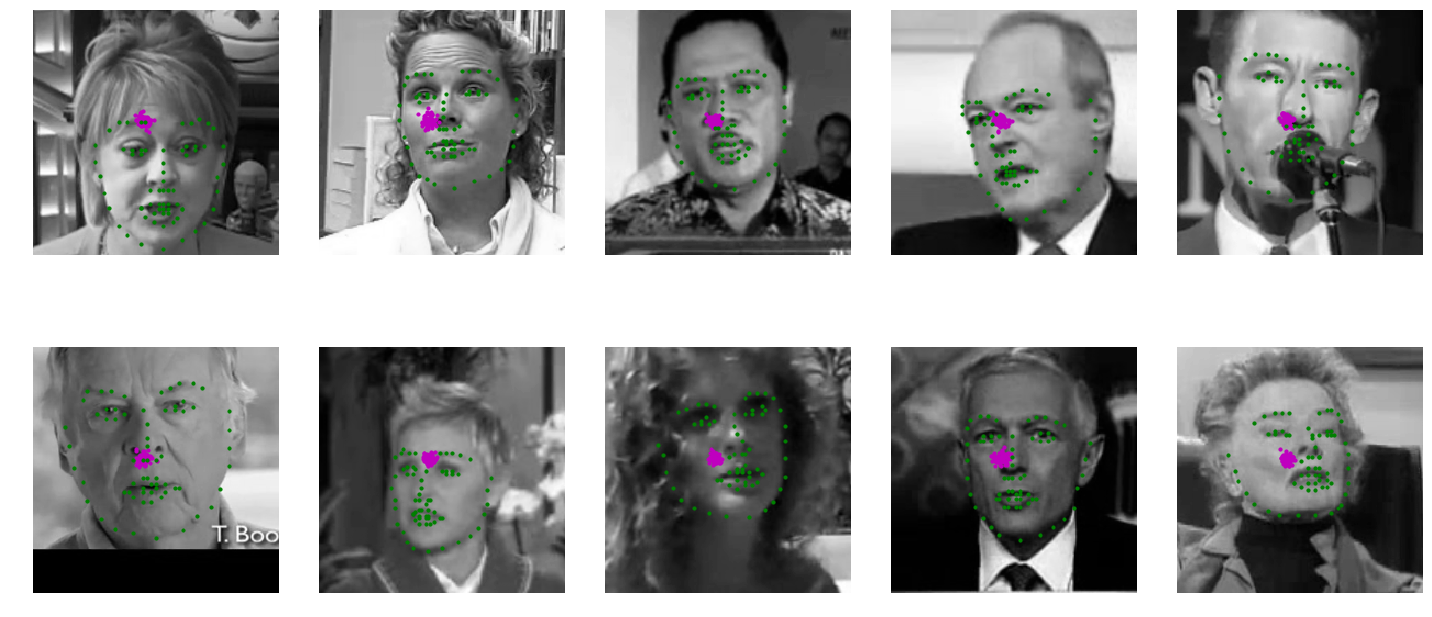

In [12]:
# visualize the output
# by default this shows a batch of 10 images
def visualize_output(test_images, test_outputs, gt_pts=None, batch_size=10):
    plt.figure(figsize=(20,10))
    for i in range(batch_size):
        #plt.figure(figsize=(20,10))
        #ax = plt.subplot(1, batch_size, i+1)
        ax = plt.subplot(2, 5, i+1)

        # un-transform the image data
        image = test_images[i].data   # get the image from it's Variable wrapper
        image = image.numpy()   # convert to numpy array from a Tensor
        image = np.transpose(image, (1, 2, 0))   # transpose to go from torch to numpy image

        # un-transform the predicted key_pts data
        predicted_key_pts = test_outputs[i].data
        predicted_key_pts = predicted_key_pts.numpy()
        # undo normalization of keypoints  
        predicted_key_pts = predicted_key_pts*50.0+100
        
        # plot ground truth points for comparison, if they exist
        ground_truth_pts = None
        if gt_pts is not None:
            ground_truth_pts = gt_pts[i]         
            ground_truth_pts = ground_truth_pts*50.0+100
        
        # call show_all_keypoints
        show_all_keypoints(np.squeeze(image), predicted_key_pts, ground_truth_pts)
            
        plt.axis('off')

        
    plt.tight_layout()
    #plt.show()
    
# call it
visualize_output(test_images, test_outputs, gt_pts)

## Training

#### Loss function
Training a network to predict keypoints is different than training a network to predict a class; instead of outputting a distribution of classes and using cross entropy loss, you may want to choose a loss function that is suited for regression, which directly compares a predicted value and target value. Read about the various kinds of loss functions (like MSE or L1/SmoothL1 loss) in [this documentation](http://pytorch.org/docs/master/_modules/torch/nn/modules/loss.html).

### TODO: Define the loss and optimization

Next, you'll define how the model will train by deciding on the loss function and optimizer.

---

In [13]:
## TODO: Define the loss and optimization
import torch.optim as optim

criterion = nn.MSELoss()
# criterion = nn.SmoothL1Loss()

# optimizer = optim.Adam(net.parameters(), lr = 0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr = 0.001)
# optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum=0.9)


In [15]:
# Loading Model and more training maybe 5-10 epochs
model_dir = 'saved_models/'
model_name = 'keypoints_model_25_epochs.pt'

cp = torch.load(model_dir+model_name)

net.load_state_dict(cp['state_dict'])
optimizer.load_state_dict(cp['optimizer'])

KeyError: 'state_dict'

## Training and Initial Observation

Now, you'll train on your batched training data from `train_loader` for a number of epochs. 

To quickly observe how your model is training and decide on whether or not you should modify it's structure or hyperparameters, you're encouraged to start off with just one or two epochs at first. As you train, note how your the model's loss behaves over time: does it decrease quickly at first and then slow down? Does it take a while to decrease in the first place? What happens if you change the batch size of your training data or modify your loss function? etc. 

Use these initial observations to make changes to your model and decide on the best architecture before you train for many epochs and create a final model.

In [16]:
from workspace_utils import keep_awake

def train_net(n_epochs):

    # prepare the net for training
    net.train()

    # for epoch in range(n_epochs):  # loop over the dataset multiple times
    for epoch in keep_awake(range(n_epochs)):  # loop over the dataset multiple times
        
        running_loss = 0.0

        # train on batches of data, assumes you already have train_loader
        for batch_i, data in enumerate(train_loader):
            # get the input images and their corresponding labels
            images = data['image']
            key_pts = data['keypoints']

            # flatten pts
            key_pts = key_pts.view(key_pts.size(0), -1)

            # convert variables to floats for regression loss
            key_pts = key_pts.type(torch.FloatTensor)
            images = images.type(torch.FloatTensor)

            # forward pass to get outputs
            output_pts = net(images)

            # calculate the loss between predicted and target keypoints
            loss = criterion(output_pts, key_pts)

            # zero the parameter (weight) gradients
            optimizer.zero_grad()
            
            # backward pass to calculate the weight gradients
            loss.backward()

            # update the weights
            optimizer.step()

            # print loss statistics
            running_loss += loss.item()
            if batch_i % 10 == 9:    # print every 10 batches
                print('Epoch: {}, Batch: {}, Avg. Loss: {}'.format(epoch + 1, batch_i+1, running_loss/10))
                running_loss = 0.0

    print('Finished Training')


In [49]:
# train your network
n_epochs = 5 # start small, and increase when you've decided on your model structure and hyperparams

# this is a Workspaces-specific context manager to keep the connection
# alive while training your model, not part of pytorch
with active_session():
    train_net(n_epochs)
    
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_30_epochs.pt'

# after training, save your model parameters in the dir 'saved_models'
torch.save(net.state_dict(), model_dir+model_name)

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 1, Batch: 10, Avg. Loss: 0.04678574651479721
Epoch: 1, Batch: 20, Avg. Loss: 0.04049248863011599
Epoch: 1, Batch: 30, Avg. Loss: 0.05143706388771534
Epoch: 1, Batch: 40, Avg. Loss: 0.03571608476340771
Epoch: 1, Batch: 50, Avg. Loss: 0.05478889402002096
Epoch: 1, Batch: 60, Avg. Loss: 0.055759204924106597
Epoch: 1, Batch: 70, Avg. Loss: 0.09165992047637701
Epoch: 1, Batch: 80, Avg. Loss: 0.0505731513723731
Epoch: 1, Batch: 90, Avg. Loss: 0.04699685387313366
Epoch: 1, Batch: 100, Avg. Loss: 0.0397600507363677
Epoch: 1, Batch: 110, Avg. Loss: 0.04770142678171396
Epoch: 1, Batch: 120, Avg. Loss: 0.05993562787771225
Epoch: 1, Batch: 130, Avg. Loss: 0.03360642474144697
Epoch: 1, Batch: 140, Avg. Loss: 0.050821310468018056
Epoch: 1, Batch: 150, Avg. Loss: 0.036310707591474055
Epoch: 1, Batch: 160, Avg. Loss: 0.034356636367738246
Epoch: 1, Batch: 170, Avg. Loss: 0.051295877806842326
Epoch: 1, Batch: 180, Avg. Loss: 0.053449982404708864
Epoch: 1, Batch: 190, Avg. Loss: 0.1417269950732588

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 2, Batch: 10, Avg. Loss: 0.04503677785396576
Epoch: 2, Batch: 20, Avg. Loss: 0.03803262673318386
Epoch: 2, Batch: 30, Avg. Loss: 0.052406303398311135
Epoch: 2, Batch: 40, Avg. Loss: 0.05150159001350403
Epoch: 2, Batch: 50, Avg. Loss: 0.07268788143992425
Epoch: 2, Batch: 60, Avg. Loss: 0.04386697206646204
Epoch: 2, Batch: 70, Avg. Loss: 0.05364041700959206
Epoch: 2, Batch: 80, Avg. Loss: 0.0785631399601698
Epoch: 2, Batch: 90, Avg. Loss: 0.0506513137370348
Epoch: 2, Batch: 100, Avg. Loss: 0.03896771240979433
Epoch: 2, Batch: 110, Avg. Loss: 0.04268244281411171
Epoch: 2, Batch: 120, Avg. Loss: 0.03511620704084635
Epoch: 2, Batch: 130, Avg. Loss: 0.044104989431798455
Epoch: 2, Batch: 140, Avg. Loss: 0.04531232323497534
Epoch: 2, Batch: 150, Avg. Loss: 0.05853614769876003
Epoch: 2, Batch: 160, Avg. Loss: 0.04864119589328766
Epoch: 2, Batch: 170, Avg. Loss: 0.03725830502808094
Epoch: 2, Batch: 180, Avg. Loss: 0.03899432625621557
Epoch: 2, Batch: 190, Avg. Loss: 0.06228442955762148
Ep

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 3, Batch: 10, Avg. Loss: 0.051006533205509186
Epoch: 3, Batch: 20, Avg. Loss: 0.13562591318041087
Epoch: 3, Batch: 30, Avg. Loss: 0.045846243388950825
Epoch: 3, Batch: 40, Avg. Loss: 0.05223318189382553
Epoch: 3, Batch: 50, Avg. Loss: 0.0471587048843503
Epoch: 3, Batch: 60, Avg. Loss: 0.043380428291857245
Epoch: 3, Batch: 70, Avg. Loss: 0.03443776946514845
Epoch: 3, Batch: 80, Avg. Loss: 0.04620389044284821
Epoch: 3, Batch: 90, Avg. Loss: 0.09344725366681814
Epoch: 3, Batch: 100, Avg. Loss: 0.04979179967194795
Epoch: 3, Batch: 110, Avg. Loss: 0.048941994272172454
Epoch: 3, Batch: 120, Avg. Loss: 0.031815051846206185
Epoch: 3, Batch: 130, Avg. Loss: 0.06623541042208672
Epoch: 3, Batch: 140, Avg. Loss: 0.050942959263920784
Epoch: 3, Batch: 150, Avg. Loss: 0.031157259084284305
Epoch: 3, Batch: 160, Avg. Loss: 0.0605465829372406
Epoch: 3, Batch: 170, Avg. Loss: 0.05479432214051485
Epoch: 3, Batch: 180, Avg. Loss: 0.0444088838994503
Epoch: 3, Batch: 190, Avg. Loss: 0.0402814948931336

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 4, Batch: 10, Avg. Loss: 0.059608555398881435
Epoch: 4, Batch: 20, Avg. Loss: 0.06400166172534227
Epoch: 4, Batch: 30, Avg. Loss: 0.03949032798409462
Epoch: 4, Batch: 40, Avg. Loss: 0.06687570326030254
Epoch: 4, Batch: 50, Avg. Loss: 0.040950282104313375
Epoch: 4, Batch: 60, Avg. Loss: 0.03523043897002935
Epoch: 4, Batch: 70, Avg. Loss: 0.05646033026278019
Epoch: 4, Batch: 80, Avg. Loss: 0.03182240333408117
Epoch: 4, Batch: 90, Avg. Loss: 0.034811540693044665
Epoch: 4, Batch: 100, Avg. Loss: 0.06698310356587171
Epoch: 4, Batch: 110, Avg. Loss: 0.08969212267547846
Epoch: 4, Batch: 120, Avg. Loss: 0.047918989509344104
Epoch: 4, Batch: 130, Avg. Loss: 0.05785527434200048
Epoch: 4, Batch: 140, Avg. Loss: 0.049714949913322926
Epoch: 4, Batch: 150, Avg. Loss: 0.050187795981764795
Epoch: 4, Batch: 160, Avg. Loss: 0.036744441092014316
Epoch: 4, Batch: 170, Avg. Loss: 0.04153682123869658
Epoch: 4, Batch: 180, Avg. Loss: 0.03747641332447529
Epoch: 4, Batch: 190, Avg. Loss: 0.0436973031610

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 5, Batch: 10, Avg. Loss: 0.05757167581468821
Epoch: 5, Batch: 20, Avg. Loss: 0.037155475653707984
Epoch: 5, Batch: 30, Avg. Loss: 0.04834668580442667
Epoch: 5, Batch: 40, Avg. Loss: 0.03961446136236191
Epoch: 5, Batch: 50, Avg. Loss: 0.04524056613445282
Epoch: 5, Batch: 60, Avg. Loss: 0.050265883281826976
Epoch: 5, Batch: 70, Avg. Loss: 0.04666684120893479
Epoch: 5, Batch: 80, Avg. Loss: 0.10405924897640943
Epoch: 5, Batch: 90, Avg. Loss: 0.06680354159325361
Epoch: 5, Batch: 100, Avg. Loss: 0.04290174972265959
Epoch: 5, Batch: 110, Avg. Loss: 0.057578612491488455
Epoch: 5, Batch: 120, Avg. Loss: 0.04438430480659008
Epoch: 5, Batch: 130, Avg. Loss: 0.056132781133055684
Epoch: 5, Batch: 140, Avg. Loss: 0.046088632568717
Epoch: 5, Batch: 150, Avg. Loss: 0.06673898808658123
Epoch: 5, Batch: 160, Avg. Loss: 0.05390620026737451
Epoch: 5, Batch: 170, Avg. Loss: 0.051162544265389444
Epoch: 5, Batch: 180, Avg. Loss: 0.07225288450717926
Epoch: 5, Batch: 190, Avg. Loss: 0.04725299216806888

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 6, Batch: 10, Avg. Loss: 0.040341293439269066
Epoch: 6, Batch: 20, Avg. Loss: 0.04358421377837658
Epoch: 6, Batch: 30, Avg. Loss: 0.04109372366219759
Epoch: 6, Batch: 40, Avg. Loss: 0.04283907972276211
Epoch: 6, Batch: 50, Avg. Loss: 0.042211573012173174
Epoch: 6, Batch: 60, Avg. Loss: 0.02868606839329004
Epoch: 6, Batch: 70, Avg. Loss: 0.03859671764075756
Epoch: 6, Batch: 80, Avg. Loss: 0.039442272111773494
Epoch: 6, Batch: 90, Avg. Loss: 0.04376435298472643
Epoch: 6, Batch: 100, Avg. Loss: 0.04494001511484384
Epoch: 6, Batch: 110, Avg. Loss: 0.04007839523255825
Epoch: 6, Batch: 120, Avg. Loss: 0.032889528572559355
Epoch: 6, Batch: 130, Avg. Loss: 0.05454382374882698
Epoch: 6, Batch: 140, Avg. Loss: 0.04032948277890682
Epoch: 6, Batch: 150, Avg. Loss: 0.04051395691931248
Epoch: 6, Batch: 160, Avg. Loss: 0.04228561725467443
Epoch: 6, Batch: 170, Avg. Loss: 0.03300776109099388
Epoch: 6, Batch: 180, Avg. Loss: 0.037090405076742175
Epoch: 6, Batch: 190, Avg. Loss: 0.057008004561066

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 7, Batch: 10, Avg. Loss: 0.16797510534524918
Epoch: 7, Batch: 20, Avg. Loss: 0.10916387252509593
Epoch: 7, Batch: 30, Avg. Loss: 0.053787905536592004
Epoch: 7, Batch: 40, Avg. Loss: 0.05389868915081024
Epoch: 7, Batch: 50, Avg. Loss: 0.047017403319478034
Epoch: 7, Batch: 60, Avg. Loss: 0.043152330256998536
Epoch: 7, Batch: 70, Avg. Loss: 0.05134711321443319
Epoch: 7, Batch: 80, Avg. Loss: 0.042118997871875764
Epoch: 7, Batch: 90, Avg. Loss: 0.035468798503279685
Epoch: 7, Batch: 100, Avg. Loss: 0.04232387114316225
Epoch: 7, Batch: 110, Avg. Loss: 0.029122167453169822
Epoch: 7, Batch: 120, Avg. Loss: 0.044311448186635974
Epoch: 7, Batch: 130, Avg. Loss: 0.05999047216027975
Epoch: 7, Batch: 140, Avg. Loss: 0.04277996029704809
Epoch: 7, Batch: 150, Avg. Loss: 0.04115163125097752
Epoch: 7, Batch: 160, Avg. Loss: 0.037692629639059304
Epoch: 7, Batch: 170, Avg. Loss: 0.039844358898699285
Epoch: 7, Batch: 180, Avg. Loss: 0.03568000569939613
Epoch: 7, Batch: 190, Avg. Loss: 0.03488065544

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 8, Batch: 10, Avg. Loss: 0.047558552026748656
Epoch: 8, Batch: 20, Avg. Loss: 0.07094759177416562
Epoch: 8, Batch: 30, Avg. Loss: 0.037813051417469976
Epoch: 8, Batch: 40, Avg. Loss: 0.034348074533045295
Epoch: 8, Batch: 50, Avg. Loss: 0.0354664271697402
Epoch: 8, Batch: 60, Avg. Loss: 0.10950723607093096
Epoch: 8, Batch: 70, Avg. Loss: 0.04726115912199021
Epoch: 8, Batch: 80, Avg. Loss: 0.04241480845957994
Epoch: 8, Batch: 90, Avg. Loss: 0.030504668690264226
Epoch: 8, Batch: 100, Avg. Loss: 0.0753052918240428
Epoch: 8, Batch: 110, Avg. Loss: 0.035661058500409126
Epoch: 8, Batch: 120, Avg. Loss: 0.035451327078044416
Epoch: 8, Batch: 130, Avg. Loss: 0.09858276583254337
Epoch: 8, Batch: 140, Avg. Loss: 0.045924669876694676
Epoch: 8, Batch: 150, Avg. Loss: 0.03399853110313415
Epoch: 8, Batch: 160, Avg. Loss: 0.08646050747483969
Epoch: 8, Batch: 170, Avg. Loss: 0.04025228954851627
Epoch: 8, Batch: 180, Avg. Loss: 0.044185830466449263
Epoch: 8, Batch: 190, Avg. Loss: 0.03591494299471

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 9, Batch: 10, Avg. Loss: 0.03384844139218331
Epoch: 9, Batch: 20, Avg. Loss: 0.08157175369560718
Epoch: 9, Batch: 30, Avg. Loss: 0.0620041485875845
Epoch: 9, Batch: 40, Avg. Loss: 0.28799031898379324
Epoch: 9, Batch: 50, Avg. Loss: 0.05288182105869055
Epoch: 9, Batch: 60, Avg. Loss: 0.09192191045731306
Epoch: 9, Batch: 70, Avg. Loss: 0.07730940021574498
Epoch: 9, Batch: 80, Avg. Loss: 0.04105840884149074
Epoch: 9, Batch: 90, Avg. Loss: 0.04558260589838028
Epoch: 9, Batch: 100, Avg. Loss: 0.06999085769057274
Epoch: 9, Batch: 110, Avg. Loss: 0.03706387169659138
Epoch: 9, Batch: 120, Avg. Loss: 0.06928056813776493
Epoch: 9, Batch: 130, Avg. Loss: 0.03738479129970074
Epoch: 9, Batch: 140, Avg. Loss: 0.037061204016208646
Epoch: 9, Batch: 150, Avg. Loss: 0.03344746986404061
Epoch: 9, Batch: 160, Avg. Loss: 0.051006872579455374
Epoch: 9, Batch: 170, Avg. Loss: 0.07932602558284998
Epoch: 9, Batch: 180, Avg. Loss: 0.0440334701910615
Epoch: 9, Batch: 190, Avg. Loss: 0.036601430363953115
E

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 10, Batch: 10, Avg. Loss: 0.04032561741769314
Epoch: 10, Batch: 20, Avg. Loss: 0.0335830956697464
Epoch: 10, Batch: 30, Avg. Loss: 0.03653217051178217
Epoch: 10, Batch: 40, Avg. Loss: 0.03414980601519346
Epoch: 10, Batch: 50, Avg. Loss: 0.03484656773507595
Epoch: 10, Batch: 60, Avg. Loss: 0.03286807332187891
Epoch: 10, Batch: 70, Avg. Loss: 0.04646059274673462
Epoch: 10, Batch: 80, Avg. Loss: 0.060301579721271995
Epoch: 10, Batch: 90, Avg. Loss: 0.03091529104858637
Epoch: 10, Batch: 100, Avg. Loss: 0.06654099263250828
Epoch: 10, Batch: 110, Avg. Loss: 0.12974126432091
Epoch: 10, Batch: 120, Avg. Loss: 0.0503440236672759
Epoch: 10, Batch: 130, Avg. Loss: 0.046611886285245416
Epoch: 10, Batch: 140, Avg. Loss: 0.04790733605623245
Epoch: 10, Batch: 150, Avg. Loss: 0.046339817345142365
Epoch: 10, Batch: 160, Avg. Loss: 0.0668870348483324
Epoch: 10, Batch: 170, Avg. Loss: 0.03320163171738386
Epoch: 10, Batch: 180, Avg. Loss: 0.09664089512079954
Epoch: 10, Batch: 190, Avg. Loss: 0.0346

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 11, Batch: 10, Avg. Loss: 0.04328793529421091
Epoch: 11, Batch: 20, Avg. Loss: 0.035786802507936956
Epoch: 11, Batch: 30, Avg. Loss: 0.042561430111527444
Epoch: 11, Batch: 40, Avg. Loss: 0.045154581777751446
Epoch: 11, Batch: 50, Avg. Loss: 0.02959149219095707
Epoch: 11, Batch: 60, Avg. Loss: 0.040125883929431436
Epoch: 11, Batch: 70, Avg. Loss: 0.031063324213027953
Epoch: 11, Batch: 80, Avg. Loss: 0.03734253253787756
Epoch: 11, Batch: 90, Avg. Loss: 0.04156442210078239
Epoch: 11, Batch: 100, Avg. Loss: 0.14516998510807752
Epoch: 11, Batch: 110, Avg. Loss: 0.04593579936772585
Epoch: 11, Batch: 120, Avg. Loss: 0.03720923531800509
Epoch: 11, Batch: 130, Avg. Loss: 0.047083178721368316
Epoch: 11, Batch: 140, Avg. Loss: 0.03808744344860315
Epoch: 11, Batch: 150, Avg. Loss: 0.030413694120943545
Epoch: 11, Batch: 160, Avg. Loss: 0.04615455809980631
Epoch: 11, Batch: 170, Avg. Loss: 0.03467702195048332
Epoch: 11, Batch: 180, Avg. Loss: 0.06593314614146947
Epoch: 11, Batch: 190, Avg. Lo

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 12, Batch: 10, Avg. Loss: 0.04107313696295023
Epoch: 12, Batch: 20, Avg. Loss: 0.03976411260664463
Epoch: 12, Batch: 30, Avg. Loss: 0.037912824749946596
Epoch: 12, Batch: 40, Avg. Loss: 0.035337811522185805
Epoch: 12, Batch: 50, Avg. Loss: 0.040117130056023596
Epoch: 12, Batch: 60, Avg. Loss: 0.06412577517330646
Epoch: 12, Batch: 70, Avg. Loss: 0.042683806642889975
Epoch: 12, Batch: 80, Avg. Loss: 0.03669168706983328
Epoch: 12, Batch: 90, Avg. Loss: 0.045271534286439416
Epoch: 12, Batch: 100, Avg. Loss: 0.0420835081487894
Epoch: 12, Batch: 110, Avg. Loss: 0.03321542423218489
Epoch: 12, Batch: 120, Avg. Loss: 0.036957493610680105
Epoch: 12, Batch: 130, Avg. Loss: 0.08764457795768976
Epoch: 12, Batch: 140, Avg. Loss: 0.06371087208390236
Epoch: 12, Batch: 150, Avg. Loss: 0.041808892600238325
Epoch: 12, Batch: 160, Avg. Loss: 0.21345083154737948
Epoch: 12, Batch: 170, Avg. Loss: 0.0432740380987525
Epoch: 12, Batch: 180, Avg. Loss: 0.04837431143969297
Epoch: 12, Batch: 190, Avg. Loss

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 13, Batch: 10, Avg. Loss: 0.04668702073395252
Epoch: 13, Batch: 20, Avg. Loss: 0.040046361088752744
Epoch: 13, Batch: 30, Avg. Loss: 0.03439624048769474
Epoch: 13, Batch: 40, Avg. Loss: 0.030322363413870335
Epoch: 13, Batch: 50, Avg. Loss: 0.12813164237886668
Epoch: 13, Batch: 60, Avg. Loss: 0.03602158334106207
Epoch: 13, Batch: 70, Avg. Loss: 0.0379281522706151
Epoch: 13, Batch: 80, Avg. Loss: 0.04546189829707146
Epoch: 13, Batch: 90, Avg. Loss: 0.030671755224466322
Epoch: 13, Batch: 100, Avg. Loss: 0.035953914280980825
Epoch: 13, Batch: 110, Avg. Loss: 0.031426360458135606
Epoch: 13, Batch: 120, Avg. Loss: 0.03339571096003056
Epoch: 13, Batch: 130, Avg. Loss: 0.04628173839300871
Epoch: 13, Batch: 140, Avg. Loss: 0.038233564049005506
Epoch: 13, Batch: 150, Avg. Loss: 0.035755918733775614
Epoch: 13, Batch: 160, Avg. Loss: 0.04195856545120478
Epoch: 13, Batch: 170, Avg. Loss: 0.05016125608235598
Epoch: 13, Batch: 180, Avg. Loss: 0.22510448917746545
Epoch: 13, Batch: 190, Avg. Los

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 14, Batch: 10, Avg. Loss: 0.03246437441557646
Epoch: 14, Batch: 20, Avg. Loss: 0.0536352027207613
Epoch: 14, Batch: 30, Avg. Loss: 0.032741778157651426
Epoch: 14, Batch: 40, Avg. Loss: 0.0852552404627204
Epoch: 14, Batch: 50, Avg. Loss: 0.04020771197974682
Epoch: 14, Batch: 60, Avg. Loss: 0.03567489888519049
Epoch: 14, Batch: 70, Avg. Loss: 0.02863785792142153
Epoch: 14, Batch: 80, Avg. Loss: 0.026272781752049924
Epoch: 14, Batch: 90, Avg. Loss: 0.03012699158862233
Epoch: 14, Batch: 100, Avg. Loss: 0.04741900358349085
Epoch: 14, Batch: 110, Avg. Loss: 0.04424688033759594
Epoch: 14, Batch: 120, Avg. Loss: 0.04059566017240286
Epoch: 14, Batch: 130, Avg. Loss: 0.043971745297312737
Epoch: 14, Batch: 140, Avg. Loss: 0.03818969447165728
Epoch: 14, Batch: 150, Avg. Loss: 0.03249599728733301
Epoch: 14, Batch: 160, Avg. Loss: 0.15197775326669216
Epoch: 14, Batch: 170, Avg. Loss: 0.05043412055820227
Epoch: 14, Batch: 180, Avg. Loss: 0.03000677693635225
Epoch: 14, Batch: 190, Avg. Loss: 0.

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


Epoch: 15, Batch: 10, Avg. Loss: 0.044287164509296414
Epoch: 15, Batch: 20, Avg. Loss: 0.034886662103235724
Epoch: 15, Batch: 30, Avg. Loss: 0.047214691527187824
Epoch: 15, Batch: 40, Avg. Loss: 0.03480001911520958
Epoch: 15, Batch: 50, Avg. Loss: 0.03200122825801373
Epoch: 15, Batch: 60, Avg. Loss: 0.03056276813149452
Epoch: 15, Batch: 70, Avg. Loss: 0.049230325222015384
Epoch: 15, Batch: 80, Avg. Loss: 0.02402725797146559
Epoch: 15, Batch: 90, Avg. Loss: 0.031383881159126756
Epoch: 15, Batch: 100, Avg. Loss: 0.03849644921720028
Epoch: 15, Batch: 110, Avg. Loss: 0.033514752984046936
Epoch: 15, Batch: 120, Avg. Loss: 0.044328648224473
Epoch: 15, Batch: 130, Avg. Loss: 0.033601806964725256
Epoch: 15, Batch: 140, Avg. Loss: 0.03478870689868927
Epoch: 15, Batch: 150, Avg. Loss: 0.041265603713691236
Epoch: 15, Batch: 160, Avg. Loss: 0.032590624317526816
Epoch: 15, Batch: 170, Avg. Loss: 0.07999692671000957
Epoch: 15, Batch: 180, Avg. Loss: 0.026382058672606946
Epoch: 15, Batch: 190, Avg. L

## Test data

See how your model performs on previously unseen, test data. We've already loaded and transformed this data, similar to the training data. Next, run your trained model on these images to see what kind of keypoints are produced. You should be able to see if your model is fitting each new face it sees, if the points are distributed randomly, or if the points have actually overfitted the training data and do not generalize.

In [17]:
# get a sample of test data again
test_images, test_outputs, gt_pts = net_sample_output()

print(test_images.data.size())
print(test_outputs.data.size())
print(gt_pts.size())

/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()
/home/workspace/data_load.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  key_pts = self.key_pts_frame.iloc[idx, 1:].as_matrix()


torch.Size([10, 1, 224, 224])
torch.Size([10, 68, 2])
torch.Size([10, 68, 2])


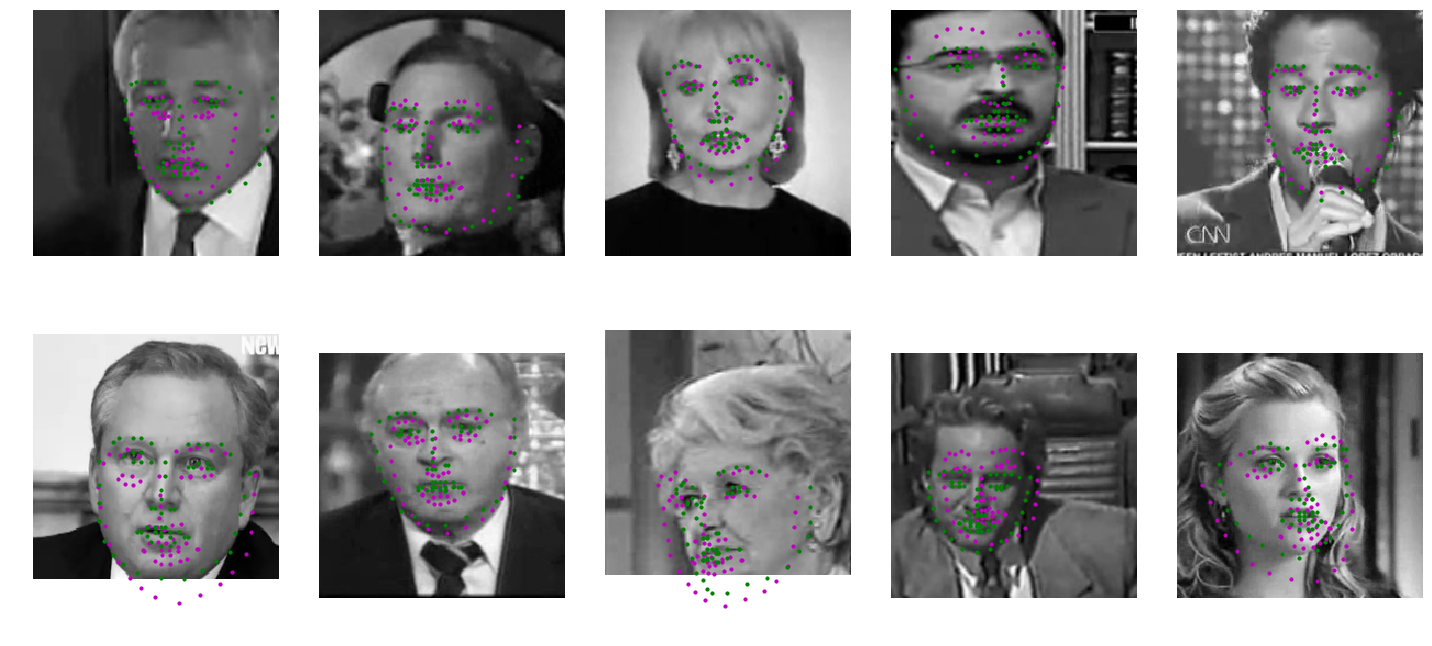

In [18]:
## TODO: visualize your test output
# you can use the same function as before, by un-commenting the line below:

visualize_output(test_images, test_outputs, gt_pts)


Once you've found a good model (or two), save your model so you can load it and use it later!

Save your models but please **delete any checkpoints and saved models before you submit your project** otherwise your workspace may be too large to submit.

In [28]:
## TODO: change the name to something uniqe for each new model
model_dir = 'saved_models/'
model_name = 'keypoints_model_25_epochs.pt'

# save the optimizer to train more later
checkpoint = {
    'state_dict': net.state_dict(),
    'optimizer': optimizer.state_dict()
}

# after training, save your model parameters in the dir 'saved_models'
torch.save(checkpoint, model_dir+model_name)

# after training, save your model parameters in the dir 'saved_models'
#torch.save(net.state_dict(), model_dir+model_name)

After you've trained a well-performing model, answer the following questions so that we have some insight into your training and architecture selection process. Answering all questions is required to pass this project.

### Question 1: What optimization and loss functions did you choose and why?


**Answer**: I chose MSELoss() (mean squared error) between the prediction and the target. Since our output is x and y coordinates, MSE would give us the Euclidean distance as the error. I also tried SmoothL1Loss().

I opted for Adam optimisation method after reading the NaimishNet - Facial Key Points Detection using Deep Convolutional Neural Network paper. I set the hyperparameter learning rate (lr) to the default value 0.001. I also tried SGD with momentum.

### Question 2: What kind of network architecture did you start with and how did it change as you tried different architectures? Did you decide to add more convolutional layers or any layers to avoid overfitting the data?

**Answer**: I started with 2 convolutional layers and one fully connected layer. After reading the NaimishNet - Facial Key Points Detection using Deep Convolutional Neural Network paper, I used 4 convolutional layers with maxpool layers and 3 fully connected layers. I also added dropout and batchnorm layers.

### Question 3: How did you decide on the number of epochs and batch_size to train your model?

**Answer**: I wanted to try batch sizes 16, 32, and 64 but Jupyter notebook gave errors each time so I had to stick to 10 for the batch size. I tried 1 epoch to play with some of the parameters and optimizers. I trained the model for a total 15 epochs, I saved the model every 5 epoch. 

## Feature Visualization

Sometimes, neural networks are thought of as a black box, given some input, they learn to produce some output. CNN's are actually learning to recognize a variety of spatial patterns and you can visualize what each convolutional layer has been trained to recognize by looking at the weights that make up each convolutional kernel and applying those one at a time to a sample image. This technique is called feature visualization and it's useful for understanding the inner workings of a CNN.

In the cell below, you can see how to extract a single filter (by index) from your first convolutional layer. The filter should appear as a grayscale grid.

[[ 0.04365951 -0.03130895 -0.14051044 -0.06606486  0.15601625]
 [ 0.09883074  0.15000521 -0.06790969  0.23066632  0.20282373]
 [ 0.19915335 -0.06187583  0.22805652 -0.16577534  0.07940241]
 [-0.05926533  0.11048863 -0.08964924  0.06231017 -0.04816965]
 [ 0.02099902 -0.06219819  0.04517744 -0.01970706 -0.16154885]]
(5, 5)


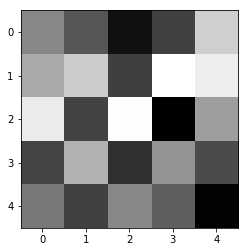

In [29]:
# Get the weights in the first conv layer, "conv1"
# if necessary, change this to reflect the name of your first conv layer
weights1 = net.conv1.weight.data

w = weights1.numpy()

filter_index = 0

print(w[filter_index][0])
print(w[filter_index][0].shape)

# display the filter weights
plt.imshow(w[filter_index][0], cmap='gray')


## Feature maps

Each CNN has at least one convolutional layer that is composed of stacked filters (also known as convolutional kernels). As a CNN trains, it learns what weights to include in it's convolutional kernels and when these kernels are applied to some input image, they produce a set of **feature maps**. So, feature maps are just sets of filtered images; they are the images produced by applying a convolutional kernel to an input image. These maps show us the features that the different layers of the neural network learn to extract. For example, you might imagine a convolutional kernel that detects the vertical edges of a face or another one that detects the corners of eyes. You can see what kind of features each of these kernels detects by applying them to an image. One such example is shown below; from the way it brings out the lines in an the image, you might characterize this as an edge detection filter.

<img src='images/feature_map_ex.png' width=50% height=50%/>


Next, choose a test image and filter it with one of the convolutional kernels in your trained CNN; look at the filtered output to get an idea what that particular kernel detects.

### TODO: Filter an image to see the effect of a convolutional kernel
---

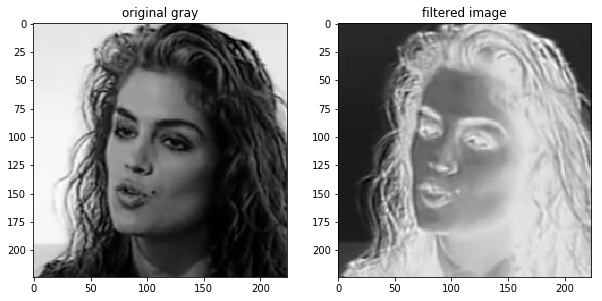

In [46]:
##TODO: load in and display any image from the transformed test dataset

## TODO: Using cv's filter2D function,
## apply a specific set of filter weights (like the one displayed above) to the test image

import cv2

imgInd = 1
filter_index = 5
im1 = np.squeeze(test_images[imgInd].data)
im1 = im1.numpy() 
myFilter=w[filter_index][0]
filtered_image = cv2.filter2D(im1, -1, myFilter)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('original gray')
ax1.imshow(im1, cmap='gray')

ax2.set_title('filtered image')
ax2.imshow(filtered_image, cmap='gray')

### Question 4: Choose one filter from your trained CNN and apply it to a test image; what purpose do you think it plays? What kind of feature do you think it detects?


**Answer**: It seems the filter enhances the dark pixels while suppressing the bright pixels. It creates a negative image. 

---
## Moving on!

Now that you've defined and trained your model (and saved the best model), you are ready to move on to the last notebook, which combines a face detector with your saved model to create a facial keypoint detection system that can predict the keypoints on *any* face in an image!